In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')
import os

In [3]:
os.chdir('D:\Python Data Analysis\IEE Fradulent')

In [4]:
df_id = pd.read_csv('train_identity.csv')
df_tra = pd.read_csv('train_transaction.csv')
df_tra_test = pd.read_csv('test_transaction.csv')

In [5]:
df_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [28]:
df_tra.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(np.sum(df_tra['TransactionID'].isin(df_id['TransactionID'])))## Here np.sum return a boolean value and sums it up


144233


In [7]:
missing_values = df_tra.isnull().sum()
print(missing_values[0:10])
total_cells = np.product(df_tra.shape)
total_missing_values = np.sum(missing_values)
Percentage_missing = ((total_missing_values)/(total_cells))*100
print('Percentage missing in Transaction =',Percentage_missing)

TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
card2             8933
card3             1565
card4             1577
card5             4259
dtype: int64
Percentage missing in Transaction = 41.073431200111266


In [8]:
missing_values = df_id.isnull().sum()
print(missing_values[0:10])
total_cells = np.product(df_id.shape)
total_missing_values = np.sum(missing_values)
Percentage_missing = ((total_missing_values)/(total_cells))*100
print('Percentage missing in ID =',Percentage_missing)

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
dtype: int64
Percentage missing in ID = 35.58109650830896


<BarContainer object of 2 artists>

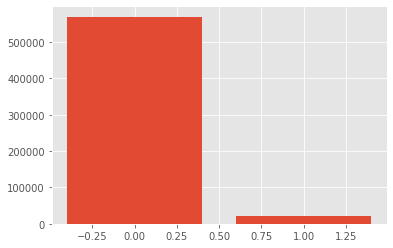

In [23]:
y = df_tra['isFraud'].value_counts().values
x =df_tra['isFraud'].value_counts().index.tolist()
plt.bar(x,y)




In [24]:
import gc
gc.enable()
del x,y
gc.collect()
## gc is a memmory cleaner and gc means garbage collector

20

In [25]:
print((max(df_tra['TransactionDT']) - min(df_tra['TransactionDT']))/(3600*24))
#This is the tranasaction duration which is one year. The training data has a duration of 181 days.

181.99920138888888


In [54]:
import math
import gc
import datetime
start_date = '2017-12-01'
df = pd.concat([df_tra_test,df_tra])

In [56]:
del df_tra,df_tra_test
gc.collect()

8242

In [60]:
startdate = datetime.datetime.strptime(start_date,'%Y-%m-%d')
##This makes start an object of datetime with the mentioned format of %Y-%m-%d
df['TransactionDT'] = df['TransactionDT'].apply(lambda x: startdate + datetime.timedelta(seconds = x))
print(df['TransactionDT'].head())
print(df['TransactionDT'].tail())


0   2018-07-02 00:00:24
1   2018-07-02 00:01:03
2   2018-07-02 00:01:50
3   2018-07-02 00:01:50
4   2018-07-02 00:01:57
Name: TransactionDT, dtype: datetime64[ns]
590535   2018-06-01 23:57:27
590536   2018-06-01 23:57:29
590537   2018-06-01 23:57:59
590538   2018-06-01 23:58:08
590539   2018-06-01 23:58:51
Name: TransactionDT, dtype: datetime64[ns]


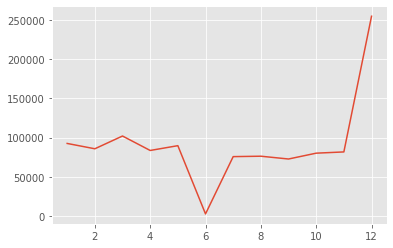

In [78]:
plt.plot(df['TransactionDT'].groupby(df["TransactionDT"].dt.month).count())
## Here the dip in month 6 shows that there was no data for that and that the last month had the maximum sales because of Black Friday and New year sales

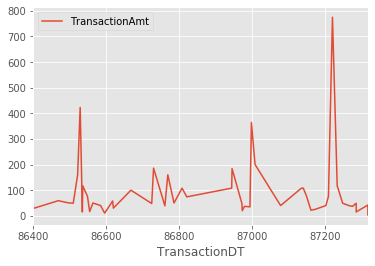

In [36]:
df_tra.iloc[0:50].plot(x = 'TransactionDT' , y = 'TransactionAmt')

The above plot is only for the first 50 rows of the df_tra column and this is because we are only taking into consideration these sets of values. If I used it completely then it would be crowded, I should be setting the axis in this case

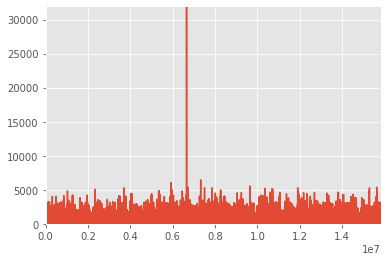

In [43]:
plt.xlim(0 , max(df_tra['TransactionDT']))
plt.ylim(0 , max(df_tra['TransactionAmt']))
plt.plot(df_tra['TransactionDT'] ,df_tra['TransactionAmt'])
plt.show()

In [51]:
df_tra['TransactionDT'].shape[0],df_tra['TransactionDT'].nunique()

(590540, 573349)

In [82]:
df_tra['TransactionDT'].value_counts().head(10)

9474817     8
11576951    5
7236588     5
4397066     5
8468062     4
8020359     4
7337054     4
5334992     4
1971839     4
1962054     4
Name: TransactionDT, dtype: int64

(86400, 15811131)

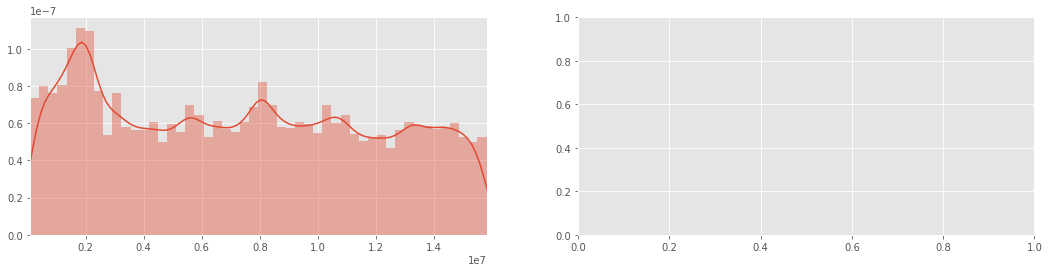

In [86]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4))
time_val = df_tra['TransactionDT'].values
sns.distplot(time_val, ax = ax[0])
ax[0].set_xlim([min(time_val),max(time_val)])

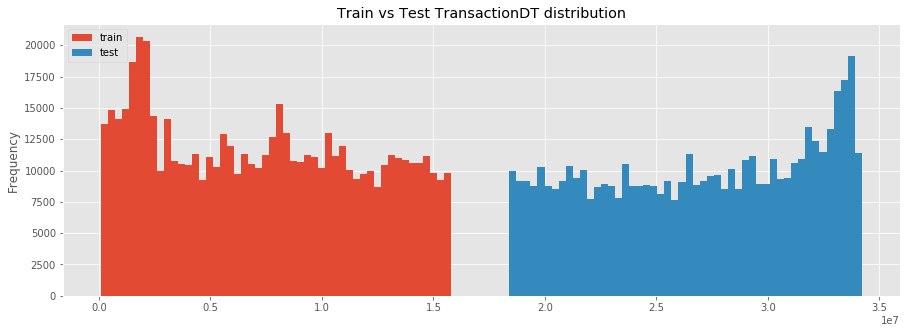

In [87]:
df_tra['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Train vs Test TransactionDT distribution')
df_tra_test['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()
plt.show()

In the below code we have plotted the TransactionDT for both the training and test data. alpha shows the amount of transparency in the scatter plot. ax is used when we wish to show two plots in the same axis as shown below. The third line of code is to show that whether the location of isFraud is present and plot only those instances if they exist or not

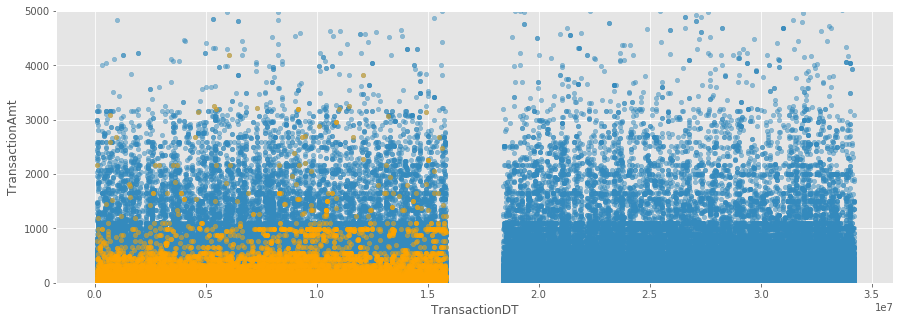

In [18]:
ax = df_tra.plot(x = 'TransactionDT',y = 'TransactionAmt',kind = 'scatter', alpha = 0.5, ylim = (0,5000),figsize = (15,5))
df_tra_test.plot(x = 'TransactionDT', y = 'TransactionAmt', kind = 'scatter', alpha = 0.5, ylim = (0,5000), ax = ax)
df_tra.loc[df_tra['isFraud'] == 1].plot(x = 'TransactionDT' , y = 'TransactionAmt', kind = 'scatter', alpha = 0.5, ylim = (0,5000), color = 'orange', ax = ax)


The below code shows the percentage of transactions that are fraud, which shows the data is highly skewed towards correct transactions and this shows us that we dont have enough data to train with for detecting false transactions

In [31]:
print('The percentage of false data =' ,((df_tra['isFraud'] == 1).value_counts()[1]/len(df_tra))*100)

The percentage of false data = 3.4990009144173126


In [37]:
(df_tra['isFraud'].mean())*100
#Here the mean gives us the amount of fraud values. This is because the sum of all the right values by the total count is mean values and it defaults gives us only wrong values 

3.4990009144173126

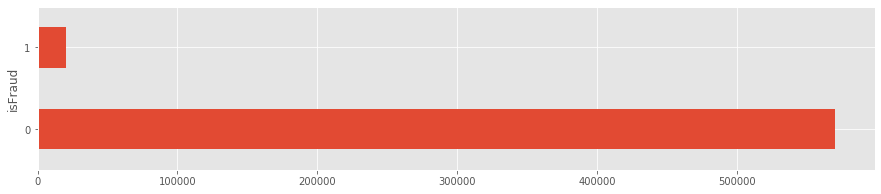

In [42]:
df_tra.groupby('isFraud').count()['TransactionID'].plot(kind = 'barh', figsize = (15,3))

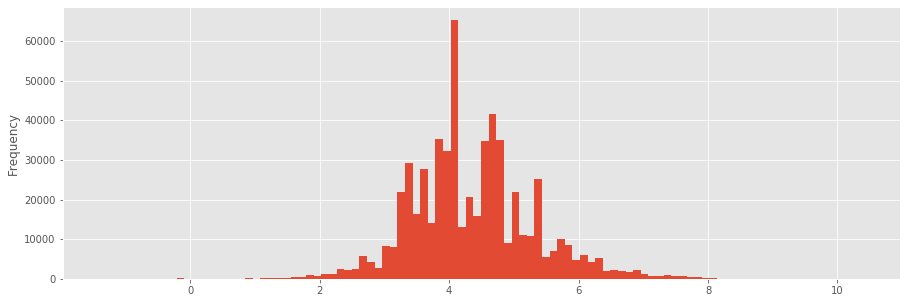

In [46]:
## In the below plot I have used log because otherwise the data would be highly skewed and inorder to avoid that we have used this method
np.log(df_tra['TransactionAmt']).plot(kind = 'hist',bins = 100,figsize = (15,5))

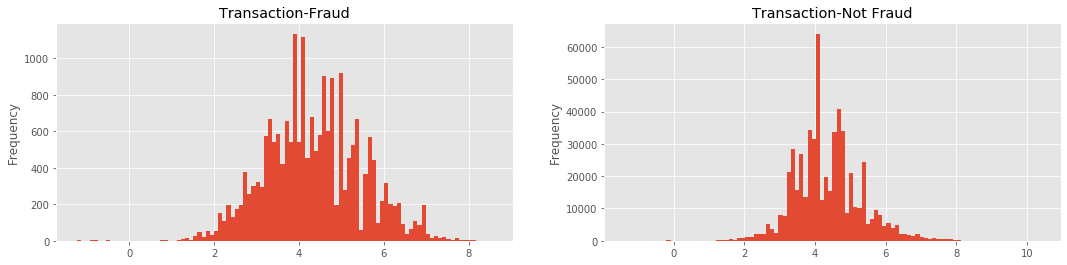

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
df_tra.loc[df_tra['isFraud']==1]['TransactionAmt'].apply(np.log).plot(kind = 'hist',bins = 100,ax = ax[0],title = 'Transaction-Fraud')
df_tra.loc[df_tra['isFraud']==0]['TransactionAmt'].apply(np.log).plot(kind = 'hist',bins = 100,ax = ax[1],title = 'Transaction-Not Fraud')

In the above code we can see that the fraud transacton though few usually take up in the larger amount cases.

In [61]:
print('Mean of the Amount value for Fraud Transactions is =', df_tra.loc[df_tra['isFraud'] == 1]['TransactionAmt'].mean())
print('Mean of the Amount value for NotFraud Transactions is =', df_tra.loc[df_tra['isFraud'] == 0]['TransactionAmt'].mean())

Mean of the Amount value for Fraud Transactions is = 149.2447785897534
Mean of the Amount value for NotFraud Transactions is = 134.51166457896034


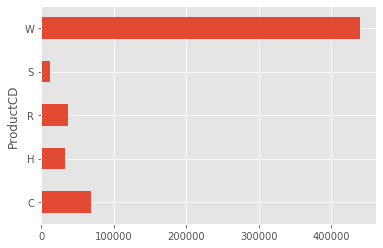

In [80]:
df_tra.groupby('ProductCD')['TransactionID'].count().plot(kind = 'barh')

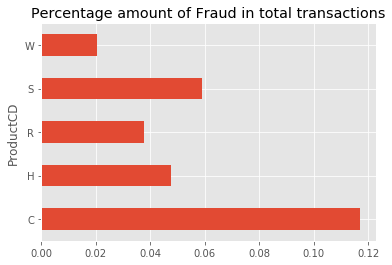

In [87]:
df_tra.groupby('ProductCD')['isFraud'].mean().plot(kind = 'barh',title = 'Percentage amount of Fraud in total transactions')

In [89]:
c = [c for c in df_tra.columns if 'card' in c ]

In [92]:
df_tra[c]

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
...,...,...,...,...,...,...
590535,6550,NaN,150.0,visa,226.0,debit
590536,10444,225.0,150.0,mastercard,224.0,debit
590537,12037,595.0,150.0,mastercard,224.0,debit
590538,7826,481.0,150.0,mastercard,224.0,debit


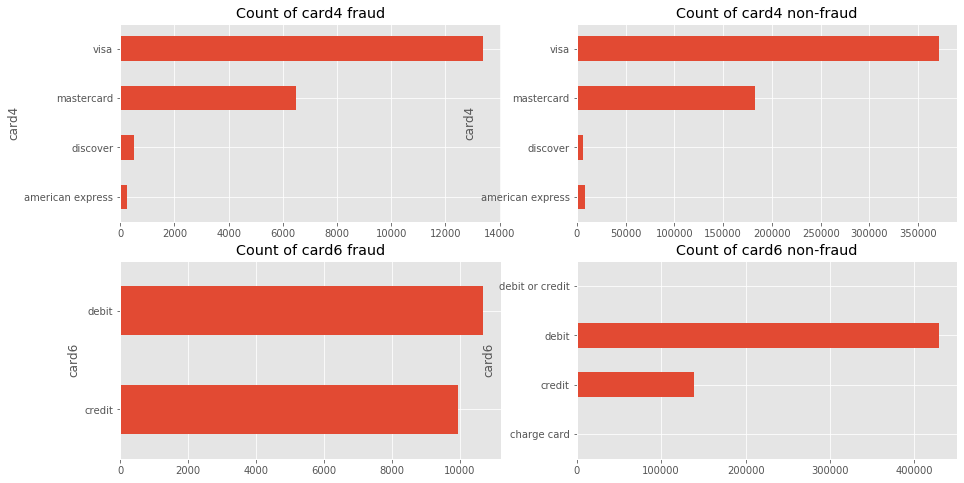

In [95]:
df_tra_fr = df_tra.loc[df_tra['isFraud'] == 1]
df_tra_nofr = df_tra.loc[df_tra['isFraud'] == 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
df_tra_fr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='Count of card4 fraud')
df_tra_nofr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='Count of card4 non-fraud')
df_tra_fr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='Count of card6 fraud')
df_tra_nofr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='Count of card6 non-fraud')
plt.show()

Columns from C1 - C14
We would like to see if these columns have any relationship between them,i.e: check their inter - relationship and understand how these plots behave.

In [4]:
c_cols = [c for c in df_tra.columns if c[0] == 'C']
print(c_cols)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']


 Here we shall be concatinating 500 samples of both Fraud and non-Fraud detection and see the relationship bewteen the diffenet columns

In [5]:
sample_train = pd.concat([df_tra.loc[df_tra['isFraud'] == 0].sample(500),
          df_tra.loc[df_tra['isFraud'] == 1].sample(500)])

In the below plot what we do is that we try to find relationships between C1 and C14 categorical variables and understand how they behave with each other.

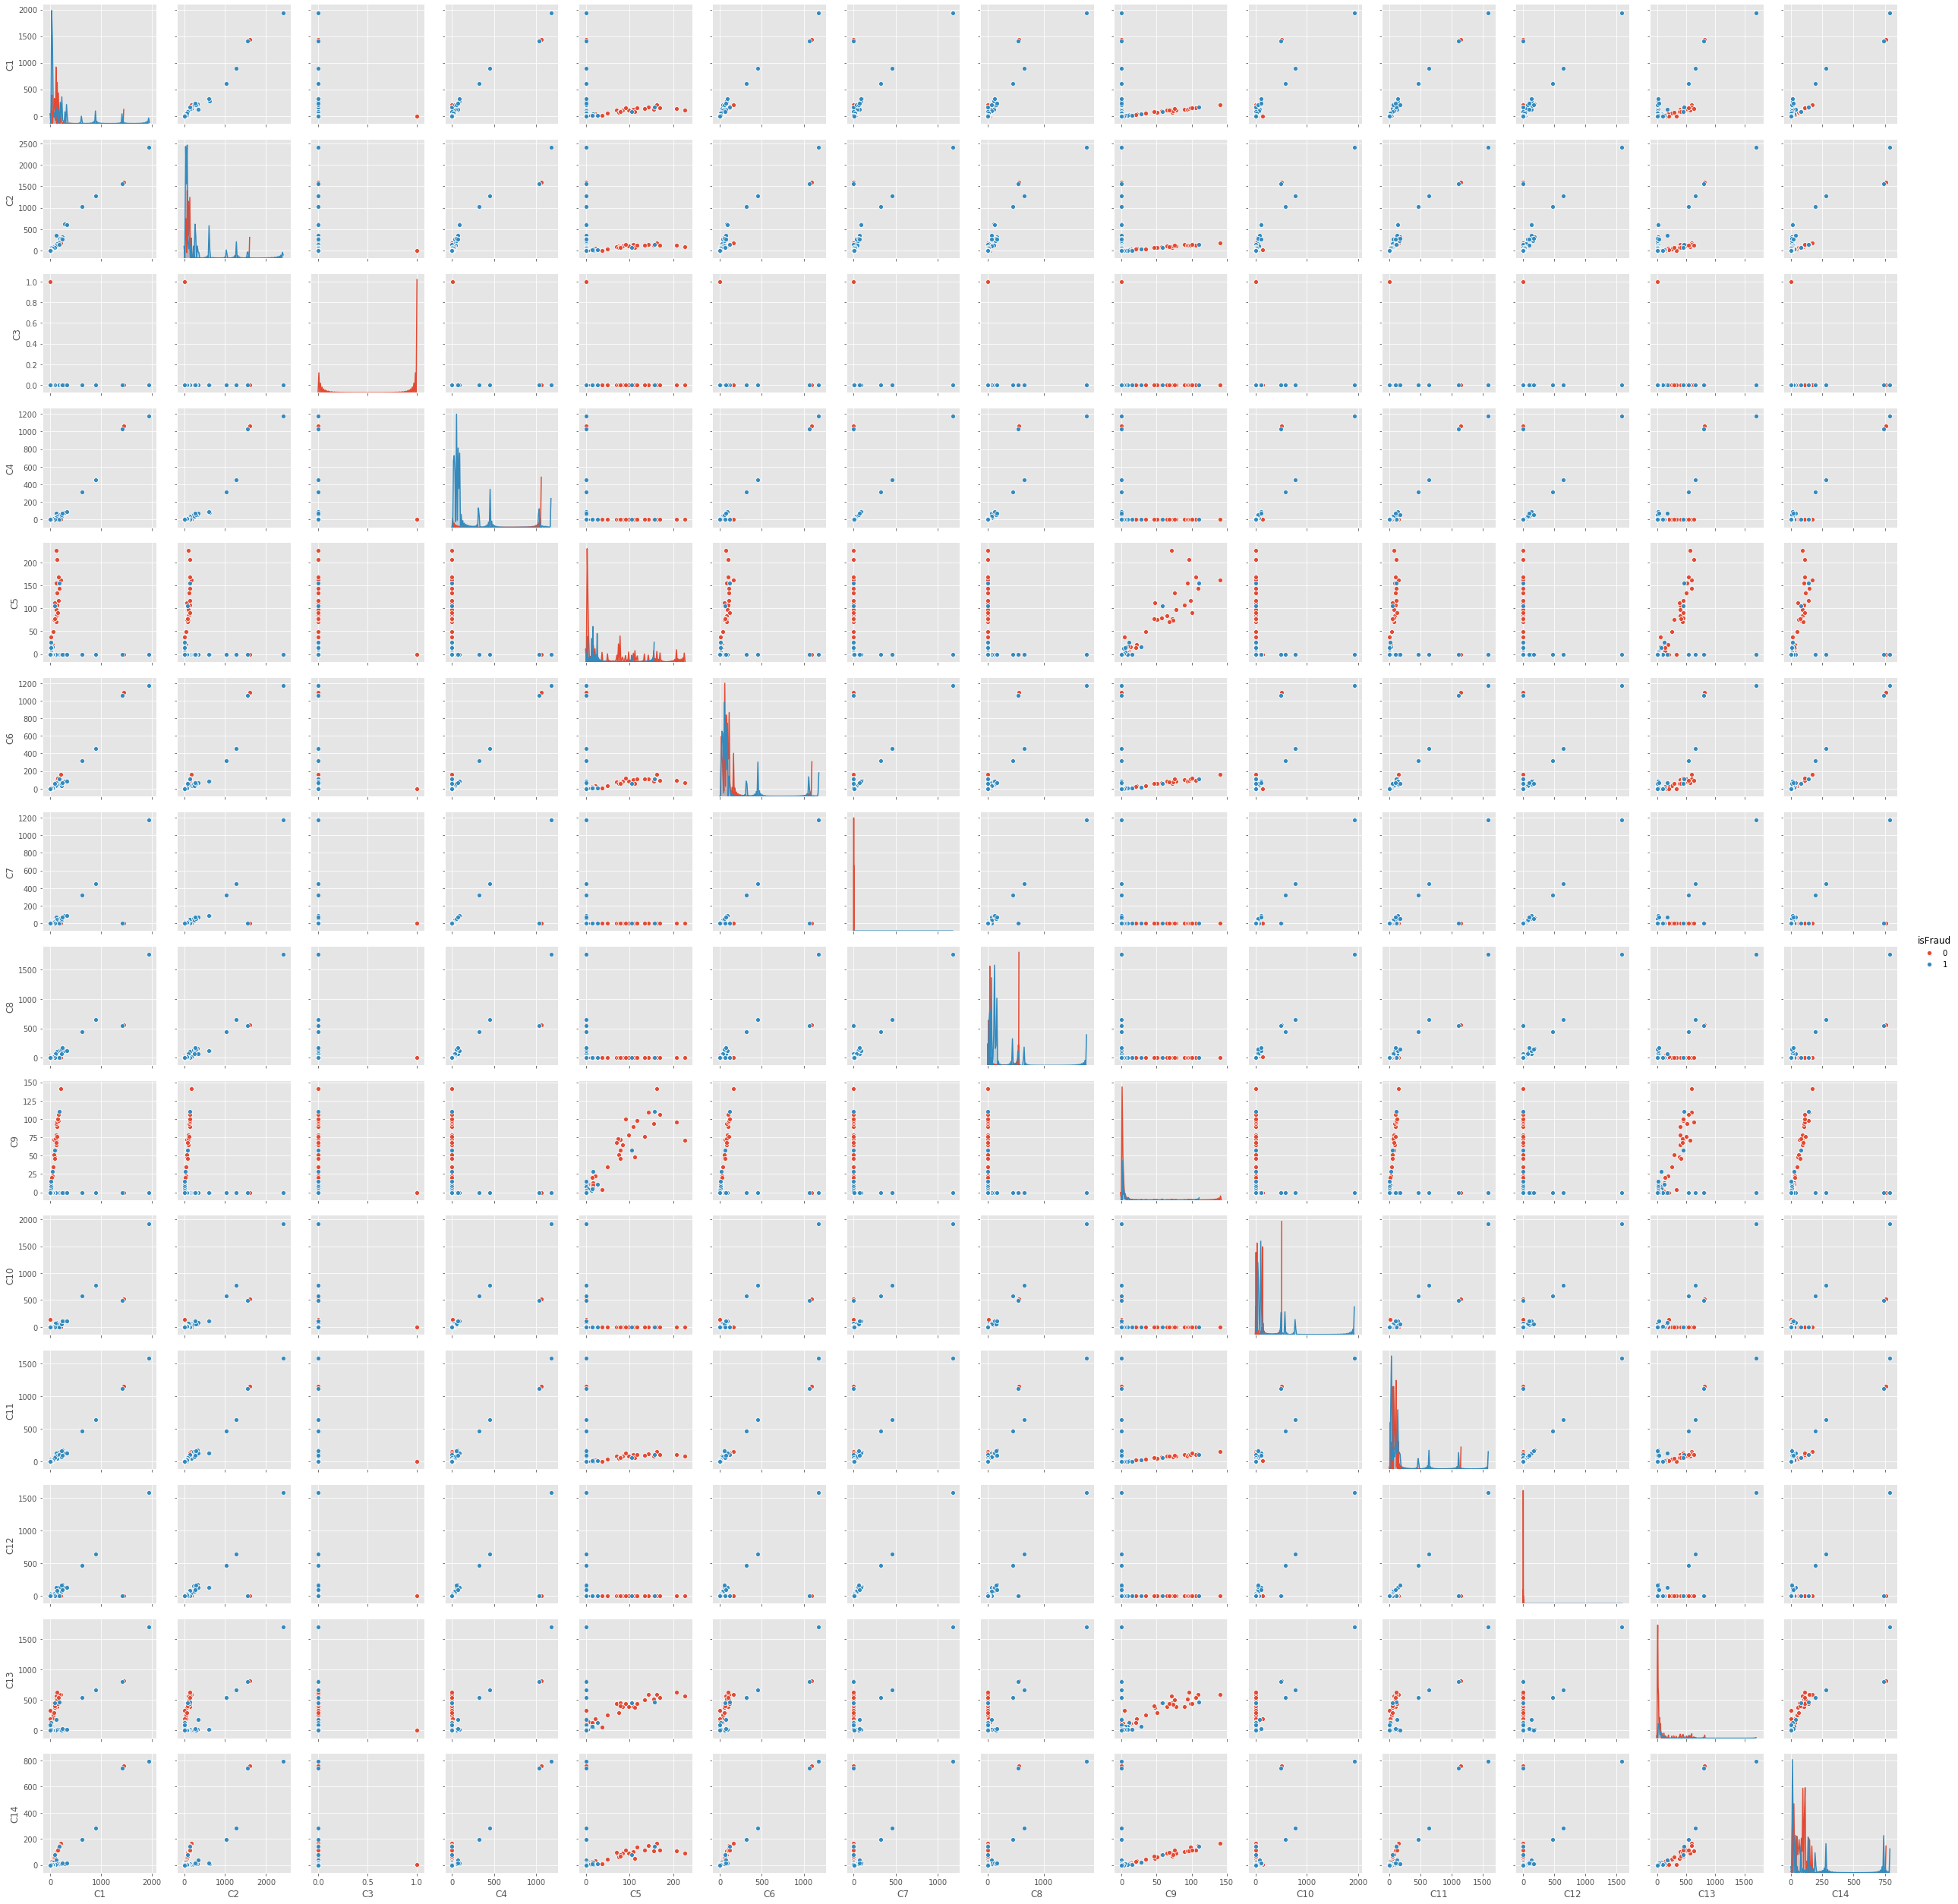

In [10]:
sns.pairplot(sample_train, 
             hue='isFraud',
            vars=c_cols)
plt.show()

Similarly we have to do the same for the D columns as well. But this I havent shown here cause the procedure is the same and the inferences we make can be undertsood from each other. Next I shall see the study the relatioship between the columns M1-M9. Let us first see the type of data present in these columns and then study them.

In [12]:
mcols = [m for m in df_tra.columns if m[0] == 'M']
print(mcols)

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [14]:
df_tra[mcols].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What we can see here is that these columns are basically categorical variables i.e:T,F and Nan. We shal see the number of T,F and Nan in each of these rows.

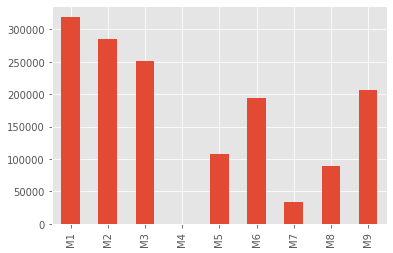

In [23]:
(df_tra[mcols] == 'T').sum().plot(kind = 'bar')

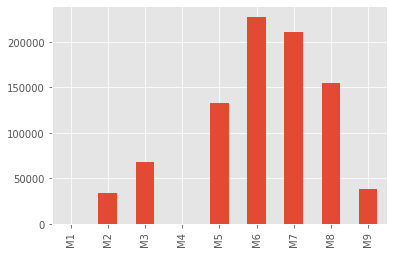

In [24]:
(df_tra[mcols] == 'F').sum().plot(kind = 'bar')

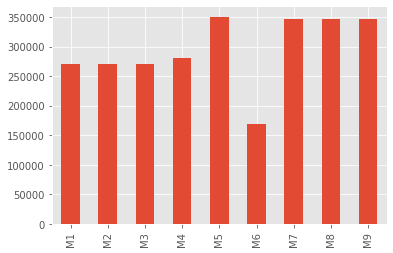

In [26]:
(df_tra[mcols].isna()).sum().plot(kind = 'bar')

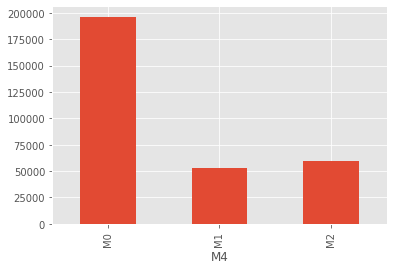

In [11]:
df_tra.groupby('M4')['TransactionDT'].count().plot(kind = 'bar')

 Identity Data
 Next we look at the indentity dataset. It has a couple of columns and we shall we what they are

In [14]:
df_id.columns


Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [15]:
df_id.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [17]:
df_id = df_id.merge(df_tra[['TransactionID','TransactionDT','isFraud']],on = ['TransactionID'])

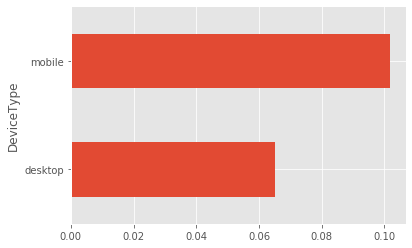

In [26]:
df_id.groupby('DeviceType').mean()['isFraud'].sort_values().plot(kind = 'barh')

Here we can see that the mobile devices have been affected more with fraud here.  

Most of the above ideas or plots have been taken with help to certain other notebooks from Kaggle and therefore a bigshout to all those who did submit notbeooks on Kaggle and helped me consolidating